In [13]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest, f_oneway
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler
import imblearn

from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [14]:
# Importing the data
consumption= pd.read_excel('CreditConsumptionData.xlsx')
behaviour= pd.read_excel('CustomerBehaviorData.xlsx')
demographic= pd.read_excel('CustomerDemographics.xlsx')

In [15]:
consumption.head(2)

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0


In [16]:
behaviour.head(2)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.0,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.0,3,49,20585.0,Y,3812.69


In [17]:
demographic.head(2)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0


In [18]:
# Describing the dataset
behaviour.describe()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
count,20000.000000,20000.000000,20000.000000,1.999900e+04,20000.000000,20000.000000,19999.000000,19999.000000,20000.000000,20000.000000,...,2.000000e+04,20000.00000,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000,2.000000e+04,1.999900e+04
mean,9999.500000,17856.990922,8130.453414,1.618836e+04,7702.427191,12135.806021,7109.708341,41.611631,33.569100,41.470200,...,8.293707e+04,11.91900,40.974850,5.820799e+04,7.812280e+04,7.881693e+04,19.905450,44.529100,5.284985e+04,1.539887e+04
std,5773.647028,25158.878234,14572.188829,2.651068e+04,17892.731800,18790.984789,13313.935609,97.835475,50.316925,46.825658,...,1.714761e+05,16.85576,40.561202,2.085914e+05,2.448983e+05,1.569872e+05,27.055323,35.080453,1.343175e+05,1.202541e+05
min,0.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,...,1.061000e+01,0.00000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00
25%,4999.750000,4377.000000,1624.650000,3.635910e+03,1634.260000,2999.075000,1361.100000,5.000000,8.000000,10.000000,...,2.521075e+04,2.00000,11.000000,2.020225e+04,2.576311e+04,2.492008e+04,4.000000,12.000000,1.896450e+04,1.545940e+03
50%,9999.500000,10214.642500,3964.750000,8.635230e+03,3791.720000,6656.800000,3326.000000,10.000000,23.000000,35.000000,...,4.813718e+04,4.00000,23.000000,3.149650e+04,4.572505e+04,4.618300e+04,7.000000,37.000000,3.025000e+04,3.934660e+03
75%,14999.250000,21189.000000,9339.020000,1.865531e+04,8263.590000,14195.727500,7458.820000,44.000000,43.000000,61.000000,...,9.447656e+04,11.00000,69.000000,5.642100e+04,8.529653e+04,8.602000e+04,21.000000,73.000000,5.344900e+04,9.376390e+03
max,19999.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.000000,653.000000,...,1.060175e+07,71.00000,171.000000,1.000000e+07,2.642915e+07,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06


In [19]:
# Describing the dataset
demographic.describe()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
count,20000.000000,20000.000000,20000.000000,20000.000000,19999.000000,20000.000000,19997.000000
mean,9999.500000,47.672300,15.217250,5.496050,598.959348,0.718000,11.044757
std,5773.647028,30.359771,20.481455,2.870452,220.105230,0.449985,5.480552
min,0.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000
25%,4999.750000,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000
50%,9999.500000,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000
75%,14999.250000,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000
max,19999.000000,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000


Data preperation

In [20]:
# Merging the data and changing the column datatypes
data= behaviour.merge(demographic, on='ID', how='inner').merge(consumption, on='ID', how='inner')
dtypes={
    'personal_loan_active':'O',
    'vehicle_loan_active':'O',
    'personal_loan_closed':'O',
    'vehicle_loan_closed':'O',
    'NetBanking_Flag':'O'

}
data= data.astype(dtypes)

In [21]:
#data['age'] = np.where(data.age>200,data.age-200,np.where(data.age>100, data.age-100, data.age))

# EDA

For continuous variables

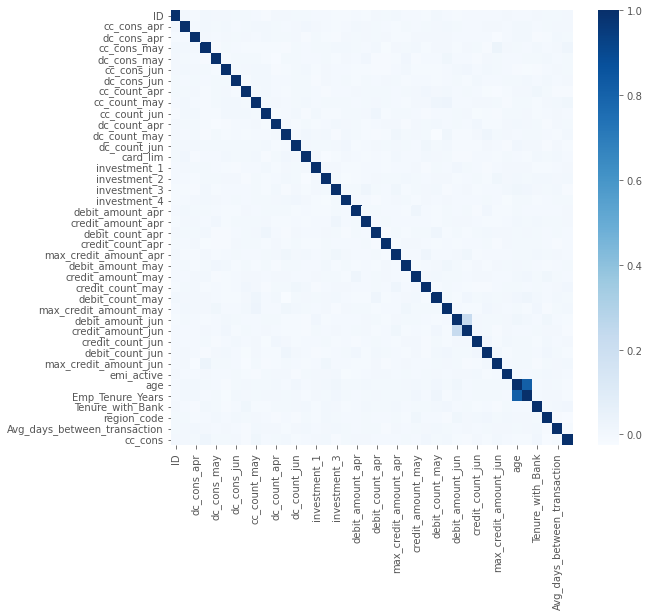

In [22]:
# Correlation plot for numerical columns
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(), cmap="Blues")
plt.show()

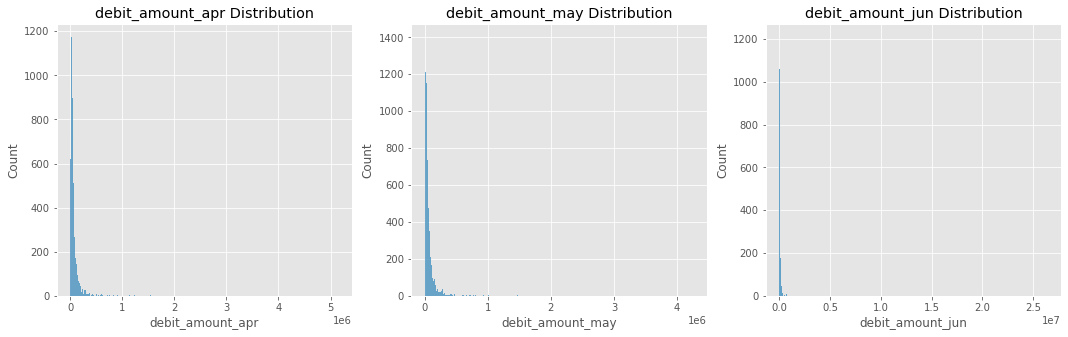

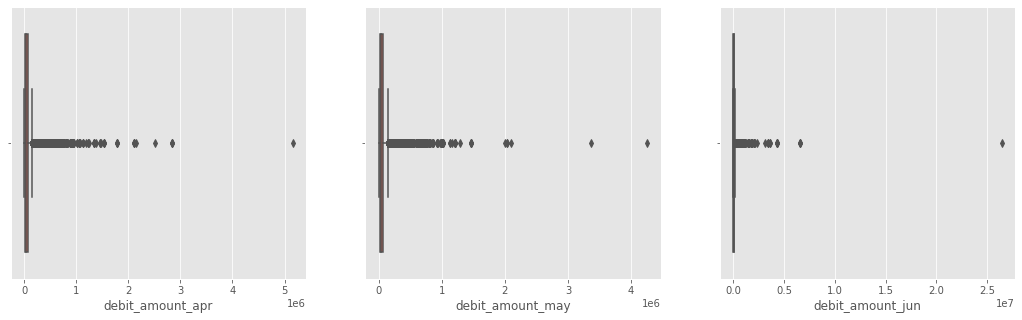

In [23]:
# Distributions for debit amounts
fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['debit_amount_apr','debit_amount_may','debit_amount_jun']):
    sns.histplot(data[j], ax=axes[i]).set_title(f'{j} Distribution')
plt.show()

fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['debit_amount_apr','debit_amount_may','debit_amount_jun']):
    sns.boxplot(data[j], ax=axes[i])
plt.show()

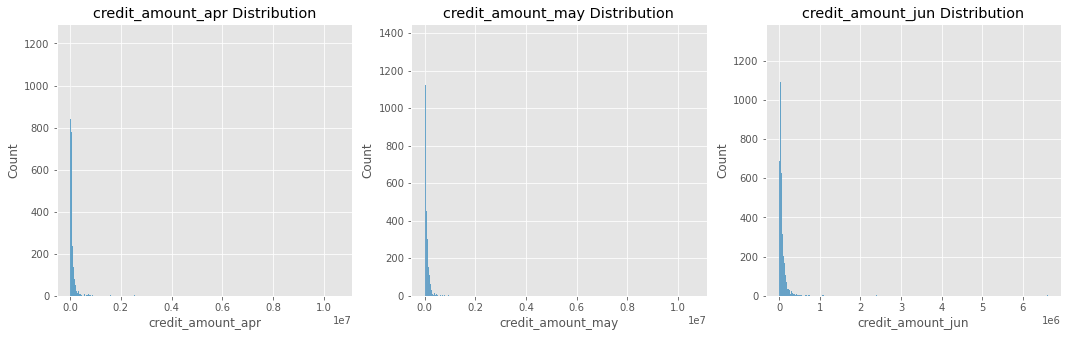

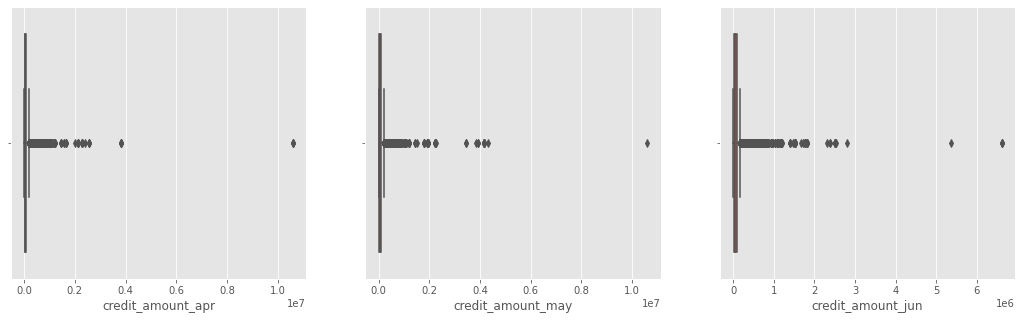

In [24]:
#Credit amount distribution
fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['credit_amount_apr','credit_amount_may','credit_amount_jun']):
    sns.histplot(data[j], ax=axes[i]).set_title(f'{j} Distribution')
plt.show()

fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['credit_amount_apr','credit_amount_may','credit_amount_jun']):
    sns.boxplot(data[j], ax=axes[i])
plt.show()

    

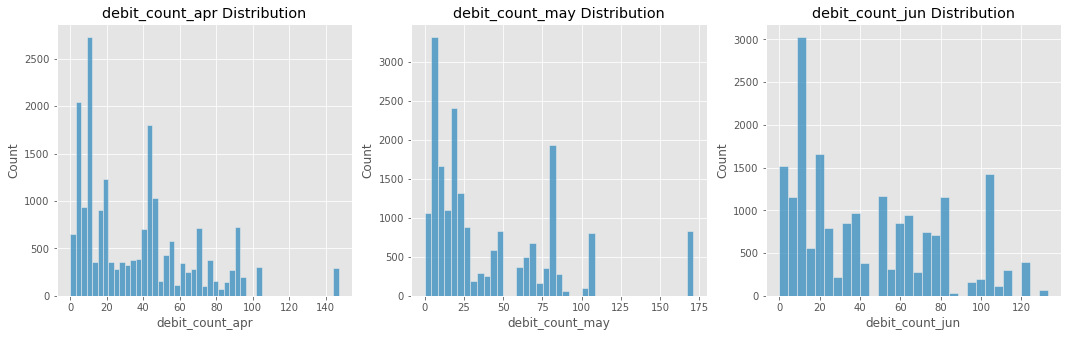

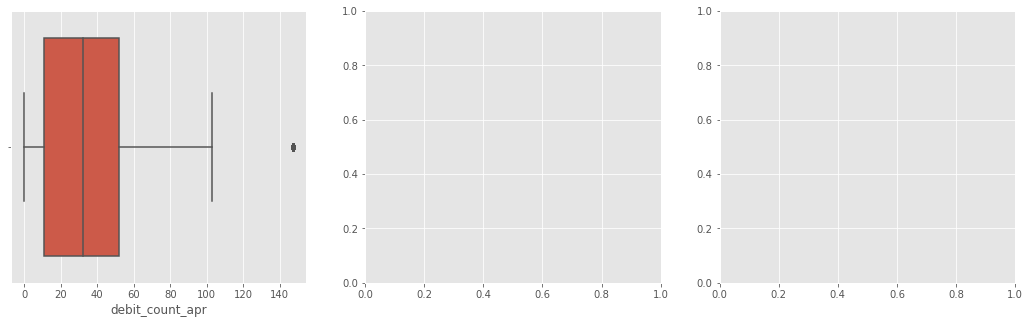

In [25]:
#Debit count distribution
fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['debit_count_apr','debit_count_may','debit_count_jun']):
    sns.histplot(data[j], ax=axes[i]).set_title(f'{j} Distribution',)
plt.show()

fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['debit_count_apr','debit_count_may','debit_count_jun']):
    sns.boxplot(data[j], ax=axes[i])
    plt.show()



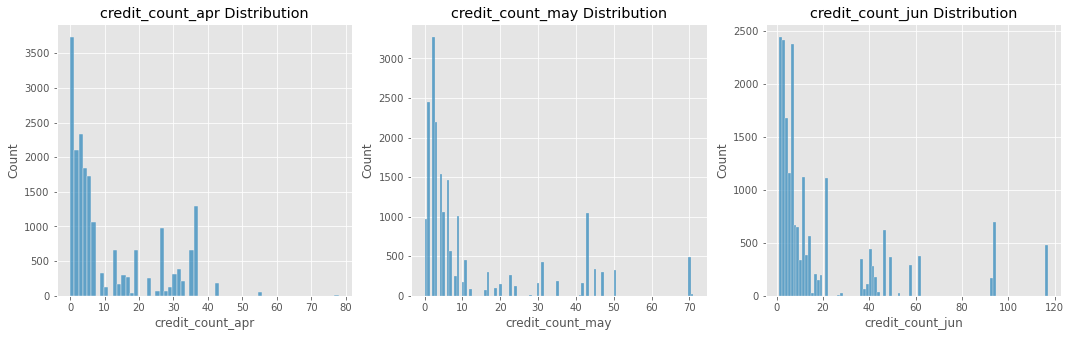

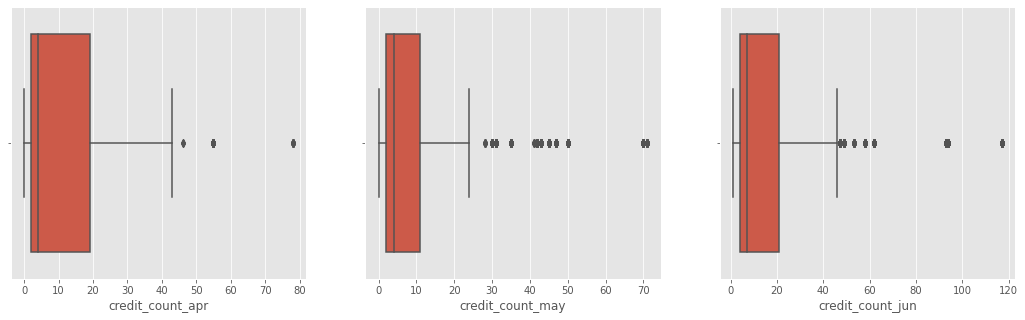

In [26]:
# credit_counts distribution
fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['credit_count_apr','credit_count_may','credit_count_jun']):
    sns.histplot(data[j], ax=axes[i]).set_title(f'{j} Distribution',)
plt.show()


fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['credit_count_apr','credit_count_may','credit_count_jun']):
    sns.boxplot(data[j], ax=axes[i])
plt.show()


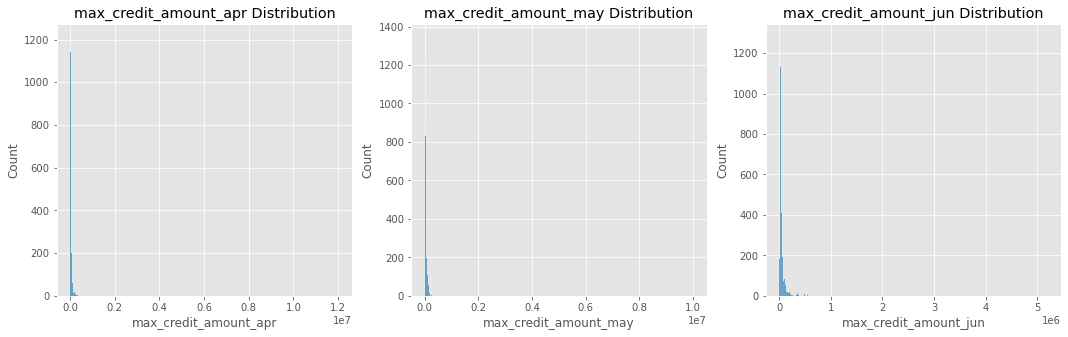

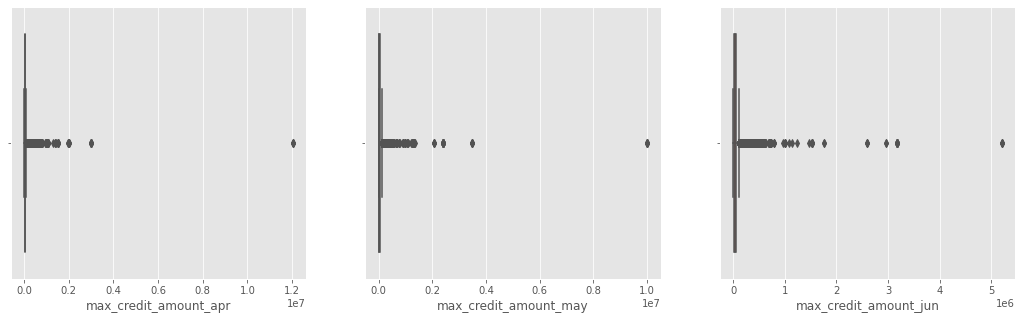

In [27]:
# Max credits distribution
fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun']):
    sns.histplot(data[j], ax=axes[i]).set_title(f'{j} Distribution')
plt.show()


fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun']):
    sns.boxplot(data[j], ax=axes[i])
plt.show()


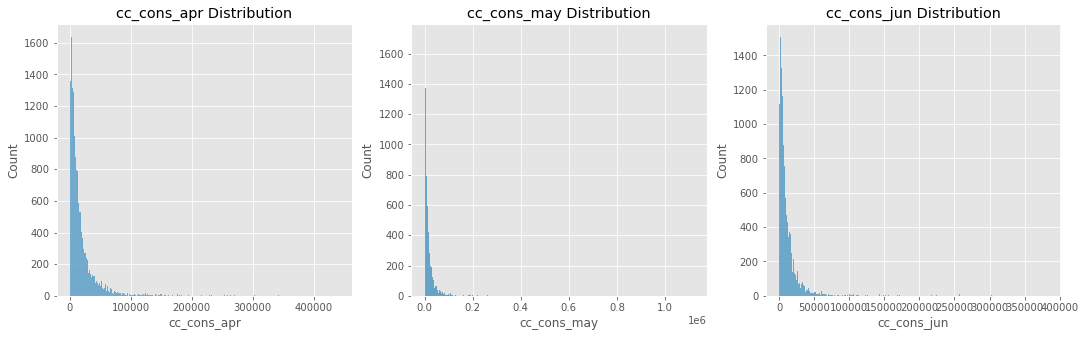

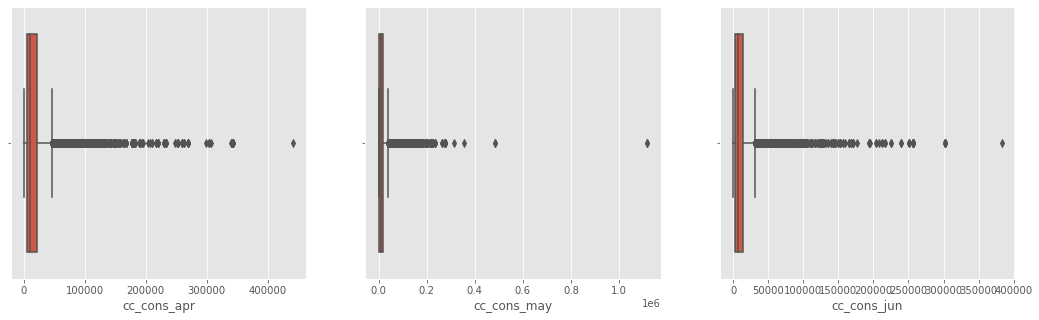

In [28]:
# Credit card spends distribution

fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun', ]):
    sns.histplot(data[j], ax=axes[i]).set_title(f'{j} Distribution')
plt.show()


fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun', ]):
    sns.boxplot(data[j], ax=axes[i])
plt.show()

    

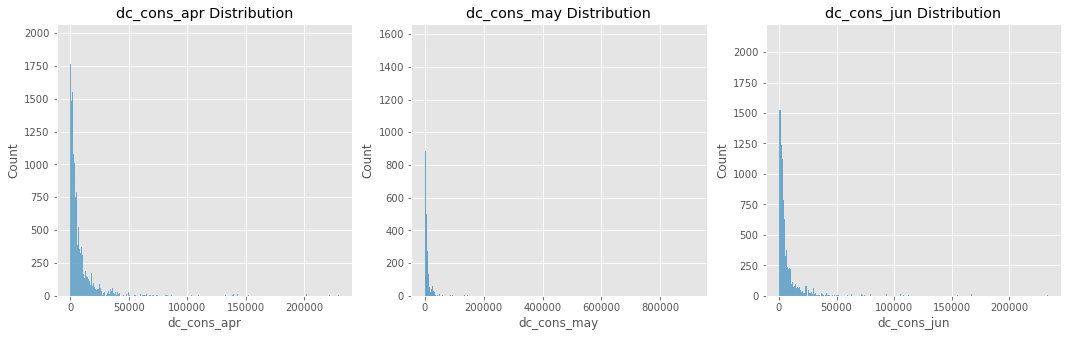

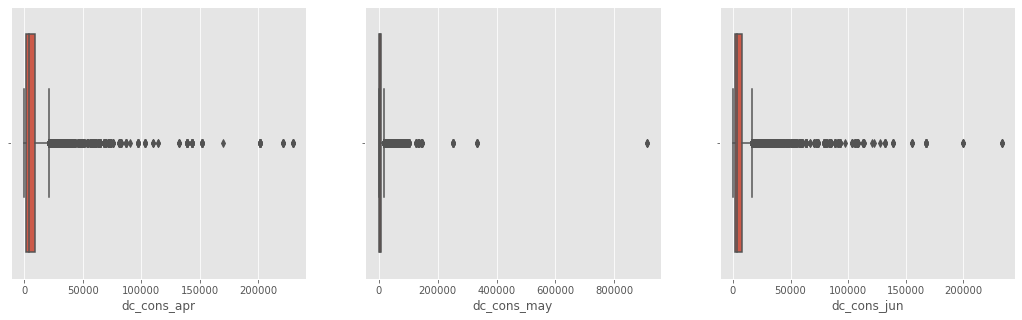

In [29]:
# Debit card spends distribution

fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', ]):
    sns.histplot(data[j], ax=axes[i]).set_title(f'{j} Distribution')
plt.show()


fig,axes = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
for i, j in enumerate(['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', ]):
    sns.boxplot(data[j], ax=axes[i])
plt.show()


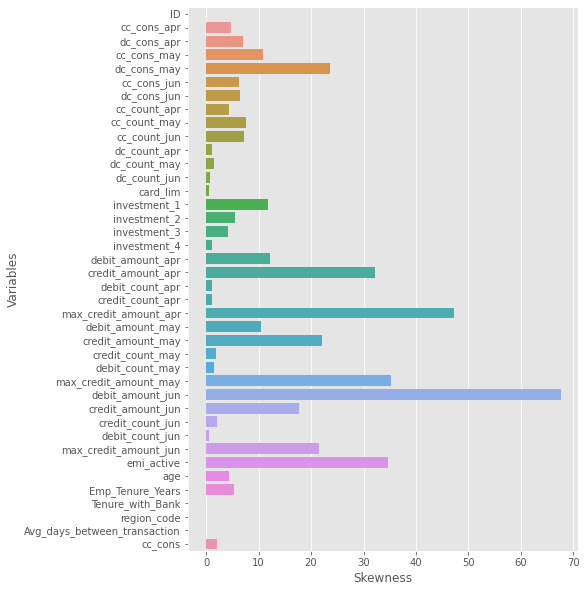

In [30]:
# Skewnesss for all continuous variables
skewness={}
for i in data.select_dtypes(include=np.number).columns.tolist():
    skewness[i]= data[i].skew()
skew=pd.DataFrame.from_dict(skewness,orient ='index')
skew = skew.reset_index()
plt.figure(figsize=(7,10))
sns.barplot(data=skew,y='index',x=0)
plt.xlabel('Skewness')
plt.ylabel('Variables')
plt.show()

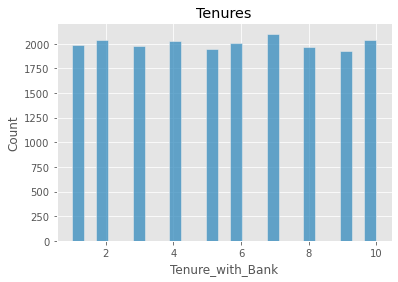

In [31]:
sns.histplot(data['Tenure_with_Bank'] )
plt.title('Tenures')
plt.show()

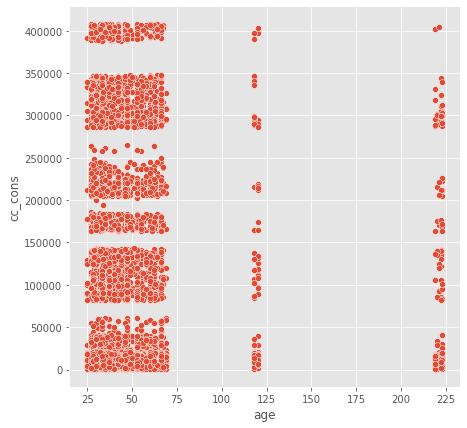

In [32]:
# Variation of age with consumption
plt.figure(figsize=(7,7))
sns.scatterplot(data=data, x='age',y='cc_cons')
plt.show()

EDA for categorical values

In [33]:
# All loan columns have 0 variatiaon so they are useless to us and no need to exolore them

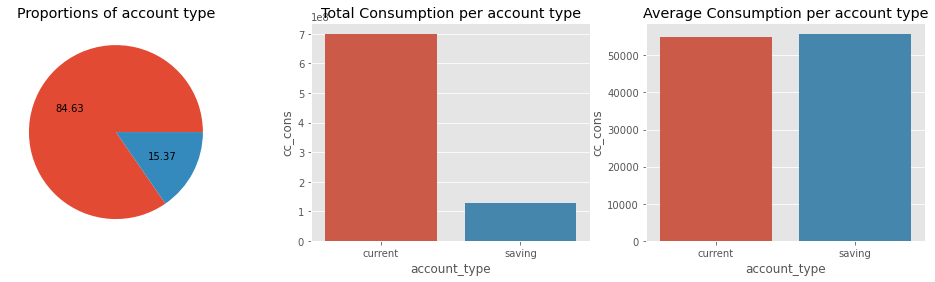

In [34]:
# Account type
fig, axes= plt.subplots(ncols=3, nrows=1, figsize=[17,4])
a=data.groupby('account_type').sum()['cc_cons'].to_frame()
b=data.groupby('account_type').mean()['cc_cons'].to_frame()
axes[0].set_title('Proportions of account type')
axes[0].pie(data['account_type'].value_counts(), autopct='%.2f')
axes[1].set_title('Total Consumption per account type')
sns.barplot(x = a.index,y= a.cc_cons, ax=axes[1])
axes[2].set_title('Average Consumption per account type')
sns.barplot(x = b.index,y= b.cc_cons, ax=axes[2])
plt.show()

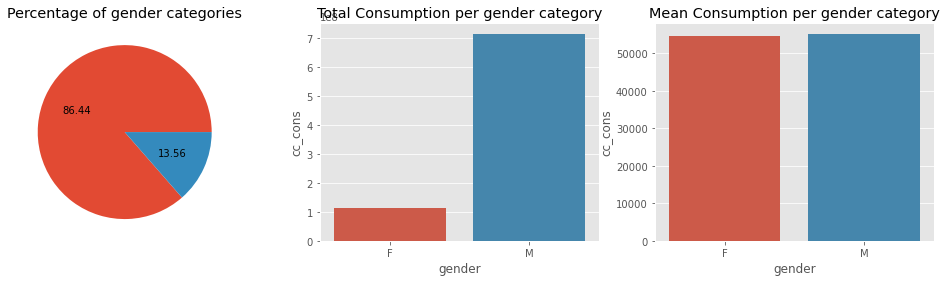

In [35]:
#Gender
fig, axes= plt.subplots(ncols=3, nrows=1, figsize=[17,4])
a=data.groupby('gender').sum()['cc_cons'].to_frame()
b=data.groupby('gender').mean()['cc_cons'].to_frame()
axes[0].set_title('Percentage of gender categories')
axes[0].pie(data['gender'].value_counts(), autopct='%.2f')
axes[1].set_title('Total Consumption per gender category')
sns.barplot(x = a.index,y= a.cc_cons, ax=axes[1])
axes[2].set_title('Mean Consumption per gender category')
sns.barplot(x = b.index,y= b.cc_cons, ax=axes[2])
plt.show()

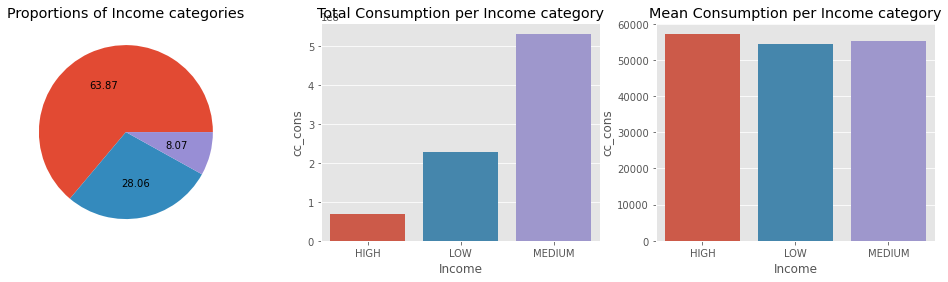

In [36]:
# Income
fig, axes= plt.subplots(ncols=3, nrows=1, figsize=[17,4])
a=data.groupby('Income').sum()['cc_cons'].to_frame()
b=data.groupby('Income').mean()['cc_cons'].to_frame()
axes[0].set_title('Proportions of Income categories')
axes[0].pie(data['Income'].value_counts(), autopct='%.2f')
axes[1].set_title('Total Consumption per Income category')
sns.barplot(x = a.index,y= a.cc_cons, ax=axes[1])
axes[2].set_title('Mean Consumption per Income category')
sns.barplot(x = b.index,y= b.cc_cons, ax=axes[2])
plt.show()

# Feature Engineering

In [37]:
# All the columns in combined dataset
data.columns

Index(['ID', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active',
       'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons'],
      dtype='object')

In [38]:
# Dropping the useless columns
data= data.drop(columns=['region_code','ID','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq'])

In [39]:
# Combining all investments columns into one and drop rest of them
data['Investments']= data['investment_1']+ data['investment_2']+data['investment_3']+data['investment_4']
data.drop(columns=['investment_1','investment_2','investment_3','investment_4'], inplace=True)

In [40]:
# Combining monthly data in single columns
data['cc_cons_old']=data['cc_cons_apr']+data['cc_cons_may']+data['cc_cons_jun']
data['cc_count']=data['cc_count_apr']+data['cc_count_may']+data['cc_count_jun']
data['dc_cons']=data['dc_cons_apr']+data['dc_cons_may']+data['dc_cons_jun']
data['dc_count']=data['dc_count_apr']+data['dc_count_may']+data['dc_count_jun']
data['debit_amount']=data['debit_amount_apr']+data['debit_amount_may']+data['debit_amount_jun']
data['credit_amount']=data['credit_amount_apr']+data['credit_amount_may']+data['credit_amount_jun']
data['debit_count']=data['debit_count_apr']+data['debit_count_may']+data['debit_count_jun']
data['credit_count']=data['credit_count_apr']+data['credit_count_may']+data['credit_count_jun']
data['max_credit_amount']=data['max_credit_amount_apr']+data['max_credit_amount_may']+data['max_credit_amount_jun']

In [41]:
# Dropping leftover columns
data.drop(columns=['cc_count_apr','cc_count_may','cc_count_jun',
'cc_cons_apr','cc_cons_may','cc_cons_jun',
'dc_cons_apr','dc_cons_may','dc_cons_jun',
'dc_count_apr','dc_count_may','dc_count_jun',
'debit_amount_apr','debit_amount_may','debit_amount_jun',
'credit_amount_apr','credit_amount_may','credit_amount_jun',
'debit_count_apr','debit_count_may','debit_count_jun',
'credit_count_apr','credit_count_may','credit_count_jun',
'max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun'],inplace=True)

In [42]:
# Encoding the dataset
data= pd.get_dummies(data,drop_first=True)

In [43]:
# Creating a seperate dataset for the data we need to predict
Predicting_data=data[data['cc_cons'].isna()==True]

In [44]:
#Missing value treatment
# Because we only have 6 missings, we can drop them
# This also removes the predicting data from the table
data.dropna(inplace=True)

In [45]:
# Removing the target column from the predicting data
Predicting_data.drop(columns='cc_cons',inplace=True)

In [46]:
# Creating preprocessing function to perform missing value treatment and outlier treatment
def preprocessing(x):
        # missing values
    if x.dtype == 'O':
        x = x.fillna(x.mode()[0]) 
    else:
        x = x.fillna(x.median())
        
        # outlier
    if x.dtype in ['float64','int64']:
        x= x.clip( upper=x.quantile(0.95), lower=x.quantile(0.05))
    return x
        
data = data.apply(preprocessing)
Predicting_data= Predicting_data.apply(preprocessing)

In [47]:
# Splitting the data
target= data['cc_cons']
feature= data.drop(columns=['cc_cons'])
x_train, x_test, y_train, y_test= train_test_split(feature,target, test_size=0.2, random_state=3644)

In [48]:
# Standardization
scaler= StandardScaler().fit(x_train)
x_train_std=pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_std=pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
Predicting_data=pd.DataFrame(scaler.transform(Predicting_data), columns=Predicting_data.columns)


Lasso regression for feature reduction

In [49]:
#Creating a linear model
Linear = linear_model.LinearRegression()
Linear=Linear.fit(x_train,y_train)
Linear_coffecient=pd.DataFrame(Linear.coef_,x_train.columns)


In [50]:
## Finding the best parameters for lasso regression model
# tuning_parameters= tuned_parameters = [{'alpha': [0.0,0.0001,0.001,0.01,0.1,1.,10.,100,1000,10000]}]
# tuning_grid= GridSearchCV(linear_model.Lasso(),
#                             param_grid=tuning_parameters,
#                             n_jobs=-1,
#                             cv=5,
#                             scoring='neg_mean_squared_error'
#                                 )
# tuning_grid = tuning_grid.fit(x_train, y_train)
# tuning_grid.best_params_

In [51]:
# Fitting Lasso Model
Lasso = linear_model.Lasso(alpha=100)
Lasso=Lasso.fit(x_train,y_train)
Lasso_coffecient=pd.DataFrame(Lasso.coef_,x_train.columns)

In [52]:
# Printing r2_score for lasso model
print(metrics.r2_score(y_train, Lasso.predict(x_train)))
print(metrics.r2_score(y_test, Lasso.predict(x_test)))

0.0017285099336191712
-0.0038846689282450164


In [53]:
# Checking which feature's weights got changed the most
difference=(Linear_coffecient-Lasso_coffecient).sort_values(by=0,ascending=True)

In [54]:
# Taking the best 15 features
l1=difference.head(15).index

RFE

In [55]:
# Building r2_model
Rfe_model =RFE(RandomForestRegressor(), n_features_to_select=18, verbose=True).fit(x_train,y_train)
# Getting column names
l2=data.iloc[:,Rfe_model.get_support(indices=True)].columns

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.


In [56]:
# Taking intersection of both lists to find the best features
l3= l1.intersection(l2)
l3.__len__()

14

In [57]:
# Taking the best features for all tables
x_train_new=x_train_std[l3]
x_test_new=x_test_std[l3]
Predicting_data=Predicting_data[l3]

# Model building

Linear regression model

In [58]:
# Building and evaluating linear model
linear_m= linear_model.LinearRegression().fit(x_train_new, np.log(y_train))

print('Train r2_score',metrics.r2_score(np.log(y_train),linear_m.predict(x_train_new)))
print('Test r2_score',metrics.r2_score(np.log(y_test),linear_m.predict(x_test_new)))

print('Train MAE',metrics.mean_absolute_error(np.log(y_train),linear_m.predict(x_train_new)))
print('Test MAE',metrics.mean_absolute_error(np.log(y_test),linear_m.predict(x_test_new)))

Train r2_score 0.0016607619775053095
Test r2_score -0.0031508904204045063
Train MAE 1.1124445656538378
Test MAE 1.0985176959498377


KNN Model

In [59]:
# # Finding the best parameters for KNN model
# knn_para={'n_neighbors':[4,5,6,7,8,9,10], 'weights':['distance','uniform']}
# knn_grid=GridSearchCV(KNeighborsRegressor(), param_grid=knn_para, verbose=True).fit(x_train_new, y_train)
# knn_grid.best_params_

In [60]:
# Building and evaluating KNN model
knn_model=KNeighborsRegressor(n_neighbors=8, weights='uniform').fit(x_train_new, y_train)

print('Train r2_score',metrics.r2_score(y_train,knn_model.predict(x_train_new)))
print('Test r2_score',metrics.r2_score(y_test,knn_model.predict(x_test_new)))

print('Train MAE',metrics.mean_absolute_error(y_train,knn_model.predict(x_train_new)))
print('Test MAE',metrics.mean_absolute_error(y_test,knn_model.predict(x_test_new)))

Train r2_score 0.13129970145214576
Test r2_score -0.11770399916569896
Train MAE 59872.9959052263
Test MAE 66651.66183333332


Random Forest

In [61]:
# # Finding the best parameters for Random Forest model
# para_grid={
#     'n_estimators': [100,200,250],
#                 'max_features': [6,8,12,14],
#               'max_depth': [5,7,11],
#               'min_samples_leaf': [1, 2, 4,6],
#                'max_leaf_nodes':[8,10,15,25],
#               'min_samples_split':[2,5,10]
# }
# rand_grid= GridSearchCV(RandomForestRegressor(), param_grid=para_grid, n_jobs=4, verbose=True, cv=5).fit(x_train_std, y_train)
# rand_grid.best_params_

In [62]:
# Fitting and evaluating RF model
rand_model=RandomForestRegressor(n_estimators=100,max_depth=5,n_jobs=4,max_features=12, min_samples_leaf=1)
rand_model.fit(x_train_new, y_train)

print('Train r2_score',metrics.r2_score(y_train,rand_model.predict(x_train_new)))
print('Test r2_score',metrics.r2_score(y_test,rand_model.predict(x_test_new)))

print('Train MAE',metrics.mean_absolute_error(y_train,rand_model.predict(x_train_new)))
print('Test MAE',metrics.mean_absolute_error(y_test,rand_model.predict(x_test_new)))

Train r2_score 0.04088409261557102
Test r2_score -0.006087968070834782
Train MAE 65874.65442733346
Test MAE 66290.48231223368


In [63]:
# As we can see, the accuracies we are getting are very bad so we have to try to improve that

In [64]:
# The first thing we will try is to divide the customers in different segments and try to apply model on that. 
#For this, we will use scientific segmentation
for num in range(3,8):  
    k_means= KMeans(n_clusters=num,random_state=123).fit(data)
    print(f'silhouette_score for {num} clusters is:',metrics.silhouette_score(data,k_means.labels_))

silhouette_score for 3 clusters is: 0.4919143722160618
silhouette_score for 4 clusters is: 0.2964543261791815
silhouette_score for 5 clusters is: 0.2530401369952764
silhouette_score for 6 clusters is: 0.23644365303212025
silhouette_score for 7 clusters is: 0.2407773926102356


In [65]:
# 3 is the best valye for n_clusters so we will segement the data in 3 clusters
k_means= KMeans(n_clusters=3,random_state=123).fit(data)

In [66]:
# Adding segment labels in the dataframe and checking the counts
data['segment']= k_means.labels_
data['segment'].value_counts()

1    11495
0     2261
2     1241
Name: segment, dtype: int64

In [67]:
# Seperating all the segments
segment1= data[data['segment']==1]
segment2= data[data['segment']==2]
segment0= data[data['segment']==0]

In [68]:
# Getting target variable for each segement dataframe
Y0=segment0['cc_cons']
Y1=segment1['cc_cons']
Y2=segment2['cc_cons']

In [69]:
# Dropping target and segment column from all the dataframes
for i in [segment0, segment1, segment2]:
    i.drop(columns=['cc_cons','segment'], inplace=True)

In [70]:
# Feature selection
# We already know which columns are important so we're gonna use the same
segment0= segment0[l3]
segment1= segment1[l3]
segment2= segment2[l3]

In [71]:
# Splitting all the segments into train and test
x_train0, x_test0, y_train0, y_test0= train_test_split(segment0,Y0, test_size=0.2, random_state=3644)
x_train1, x_test1, y_train1, y_test1= train_test_split(segment1,Y1, test_size=0.2, random_state=3644)
x_train2, x_test2, y_train2, y_test2= train_test_split(segment2,Y2, test_size=0.2, random_state=3644)

In [72]:
# standardaizing the data, we are standardizing all the segments differently so it does not effect each other:
scaler0= StandardScaler().fit(x_train0)
x_train0_std=pd.DataFrame(scaler0.transform(x_train0), columns=x_train1.columns)
x_test0_std=pd.DataFrame(scaler0.transform(x_test0), columns=x_test1.columns)

scaler1= StandardScaler().fit(x_train1)
x_train1_std=pd.DataFrame(scaler1.transform(x_train1), columns=x_train1.columns)
x_test1_std=pd.DataFrame(scaler1.transform(x_test1), columns=x_test1.columns)

scaler2= StandardScaler().fit(x_train2)
x_train2_std=pd.DataFrame(scaler2.transform(x_train2), columns=x_train2.columns)
x_test2_std=pd.DataFrame(scaler2.transform(x_test2), columns=x_test2.columns)

In [73]:
# All the feature engineering has already been done so we can get straight to modelling

# Linear regression model
k=0
for i,j, in zip([x_train0_std, x_train1_std, x_train2_std],[y_train0, y_train1, y_train2]):
    globals()[f'linear_model_{k}']= linear_model.LinearRegression().fit(i,np.log(j))
    k=k+1

In [74]:
# Metrics for linear regression model
print('R2 for segement0 train',metrics.r2_score(np.log(y_train0),linear_model_0.predict(x_train0_std)))
print('R2 for segement0 test',metrics.r2_score(np.log(y_test0),linear_model_0.predict(x_test0_std)))
print('')
print('R2 for segement1 train',metrics.r2_score(np.log(y_train1),linear_model_1.predict(x_train1_std)))
print('R2 for segement1 test',metrics.r2_score(np.log(y_test1),linear_model_1.predict(x_test1_std)))
print('')
print('R2 for segement2 train',metrics.r2_score(np.log(y_train2),linear_model_2.predict(x_train2_std)))
print('R2 for segement2 test',metrics.r2_score(np.log(y_test2),linear_model_2.predict(x_test2_std)))

R2 for segement0 train 0.0026548294128506678
R2 for segement0 test -0.006491359187113188

R2 for segement1 train 0.0024920139024352528
R2 for segement1 test -0.004272219044995307

R2 for segement2 train 0.013138009123455863
R2 for segement2 test -0.010090969245077241


KNN_model

In [75]:
# # Finding the best parameters for KNN model
# knn_para={'n_neighbors':[4,5,6,7,8,9,10], 'weights':['distance','uniform']}
# k=0
# for i,j, in zip([x_train0_std, x_train1_std, x_train2_std],[y_train0, y_train1, y_train2]):
#     knn_grid=GridSearchCV(KNeighborsRegressor(), param_grid=knn_para, verbose=True).fit(i, j)
#     print(knn_grid.best_params_)

In [76]:
# Building KNN model
k=0
for i,j, in zip([x_train0_std, x_train1_std, x_train2_std],[y_train0, y_train1, y_train2]):
    globals()[f'knn_model{k}']= KNeighborsRegressor(n_neighbors=10, weights='uniform').fit(i,j)
    k=k+1

In [77]:
# Metrics for KNN model
print('R2 for segement0 train',metrics.r2_score(y_train0,knn_model0.predict(x_train0_std)))
print('R2 for segement0 test',metrics.r2_score(y_test0,knn_model0.predict(x_test0_std)))
print('')
print('R2 for segement1 train',metrics.r2_score(y_train1,knn_model1.predict(x_train1_std)))
print('R2 for segement1 test',metrics.r2_score(y_test1,knn_model1.predict(x_test1_std)))
print('')
print('R2 for segement2 train',metrics.r2_score(y_train2,knn_model2.predict(x_train2_std)))
print('R2 for segement2 test',metrics.r2_score(y_test2,knn_model2.predict(x_test2_std)))

R2 for segement0 train 0.11732388369355251
R2 for segement0 test -0.15375247579137197

R2 for segement1 train 0.09817725030156521
R2 for segement1 test -0.10294398707317831

R2 for segement2 train 0.12494116942700695
R2 for segement2 test -0.079812445942268


Random Forest

In [78]:
# Finding the best parameters for Random forest model
# for i,j, in zip([x_train0_std, x_train1_std, x_train2_std],[y_train0, y_train1, y_train2]):
#     rand_grid= GridSearchCV(RandomForestRegressor(), param_grid=para_grid, n_jobs=4, verbose=True, cv=5).fit(i, j)
#     print(rand_grid.best_params_)

In [79]:
# This time, best parameters for all models are different, so we will be making all the models seperately
RF_model0=RandomForestRegressor(n_estimators=200,max_depth=5,n_jobs=4,max_features=8, min_samples_leaf=1,min_samples_split=2).fit(x_train0_std,y_train0)
RF_model1=RandomForestRegressor(n_estimators=200,max_depth=5,n_jobs=4,max_features=8, min_samples_leaf=4,min_samples_split=5).fit(x_train1_std,y_train1)
RF_model2=RandomForestRegressor(n_estimators=200,max_depth=5,n_jobs=4,max_features=8, min_samples_leaf=4,min_samples_split=10).fit(x_train2_std,y_train2)

In [80]:
# Metrics for Random Forest model
print('R2 for segement0 train',metrics.r2_score(y_train0,RF_model0.predict(x_train0_std)))
print('R2 for segement0 test',metrics.r2_score(y_test0,RF_model0.predict(x_test0_std)))
print('')
print('R2 for segement1 train',metrics.r2_score(y_train1,RF_model1.predict(x_train1_std)))
print('R2 for segement1 test',metrics.r2_score(y_test1,RF_model1.predict(x_test1_std)))
print('')
print('R2 for segement2 train',metrics.r2_score(y_train2,RF_model2.predict(x_train2_std)))
print('R2 for segement2 test',metrics.r2_score(y_test2,RF_model2.predict(x_test2_std)))

R2 for segement0 train 0.16428469945505575
R2 for segement0 test -0.009412867789098334

R2 for segement1 train 0.04616056336102303
R2 for segement1 test -0.007209090742178237

R2 for segement2 train 0.2598040773969589
R2 for segement2 test -0.011127878930766055


SVM

In [81]:
# # Finding the best parameters for SVM
# svm_param = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf','poly','linear']}
# for i,j, in zip([x_train0_std, x_train1_std, x_train2_std],[y_train0, y_train1, y_train2]):
#     svm_grid= GridSearchCV(SVR(), param_grid=svm_param, n_jobs=4, verbose=True, cv=5).fit(i, j)
#     print(svm_grid.best_params_)
  

In [82]:
# Building SVM models
k=0
for i,j, in zip([x_train0_std, x_train1_std, x_train2_std],[y_train0, y_train1, y_train2]):
    globals()[f'svr_model{k}']= SVR(C=10, gamma=1, kernel='poly').fit(i,j)
    k=k+1


In [83]:
# Metrics for SVM models    
print('R2 for segement0 train',metrics.r2_score(y_train0,svr_model0.predict(x_train0_std)))
print('R2 for segement0 test',metrics.r2_score(y_test0,svr_model0.predict(x_test0_std)))
print('')
print('R2 for segement1 train',metrics.r2_score(y_train1,svr_model1.predict(x_train1_std)))
print('R2 for segement1 test',metrics.r2_score(y_test1,svr_model1.predict(x_test1_std)))
print('')
print('R2 for segement2 train',metrics.r2_score(y_train2,svr_model2.predict(x_train2_std)))
print('R2 for segement2 test',metrics.r2_score(y_test2,svr_model2.predict(x_test2_std)))

R2 for segement0 train -0.1139073576645857
R2 for segement0 test -0.18538812461158294

R2 for segement1 train -0.17912620951051017
R2 for segement1 test -0.18875657285769631

R2 for segement2 train -0.10022770979875184
R2 for segement2 test -0.1966553669372988


XGBOOST

In [84]:
# # Finding best parameters for XGBoost models
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }
# XG_grid= GridSearchCV(XGBRegressor(), param_grid=params, n_jobs=4, verbose=True, cv=5).fit(x_train0_std, y_train0)
# print(XG_grid.best_params_)

In [85]:
# Building XGBoost models
k=0
for i,j, in zip([x_train0_std, x_train1_std, x_train2_std],[y_train0, y_train1, y_train2]):
    globals()[f'xg_model{k}']= XGBRegressor(colsample_bytree=1, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1).fit(i,np.log(j))
    k=k+1

In [86]:
# Metrics for XGBoost models
print('R2 for segement0 train',metrics.r2_score(np.log(y_train0),xg_model0.predict(x_train0_std)))
print('R2 for segement0 test',metrics.r2_score(np.log(y_test0),xg_model0.predict(x_test0_std)))
print('')
print('R2 for segement1 train',metrics.r2_score(np.log(y_train1),xg_model1.predict(x_train1_std)))
print('R2 for segement1 test',metrics.r2_score(np.log(y_test1),xg_model1.predict(x_test1_std)))
print('')
print('R2 for segement2 train',metrics.r2_score(np.log(y_train2),xg_model2.predict(x_train2_std)))
print('R2 for segement2 test',metrics.r2_score(np.log(y_test2),xg_model2.predict(x_test2_std)))

R2 for segement0 train 0.5816464938869985
R2 for segement0 test -0.11531348419322374

R2 for segement1 train 0.18328126940055245
R2 for segement1 test -0.05399446161040977

R2 for segement2 train 0.7792703751605323
R2 for segement2 test -0.1729384478304279


In [87]:
# Even with segmentation, models are overfitting
# Next technique we can try is by applying some segmentation of the features and targets

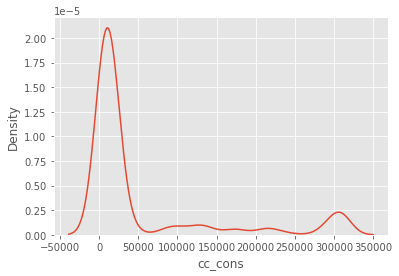

In [88]:
# Check if target variable follows a normal distribution
sns.kdeplot(target)
# target does not follow a normal distribution

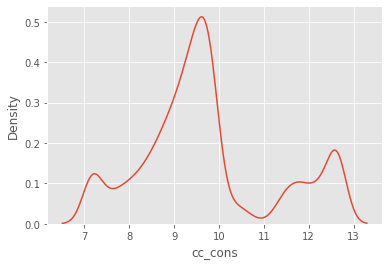

In [89]:
# Trying with log
sns.kdeplot(np.log(target))

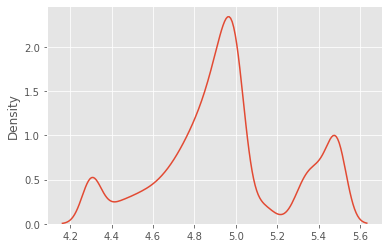

In [90]:
# BOX-COX Tranformation
from scipy import stats
fitted_data, fitted_lambda = stats.boxcox(target)
sns.kdeplot(fitted_data)

In [91]:
# Both log and box-cox are giving same output, so we will use log

# Next we can how much features and target are correlated with each other

In [92]:
a= x_train_new
a['target']=np.log(y_train)
a.corr()['target']

# We can see that most features are not related to target at all

Avg_days_between_transaction   -0.002757
Emp_Tenure_Years                0.015021
dc_count                       -0.002708
cc_count                        0.006248
cc_cons_old                    -0.011787
Investments                    -0.007492
debit_amount                    0.005380
card_lim                       -0.001067
credit_amount                   0.002066
dc_cons                         0.016545
emi_active                      0.012571
debit_count                     0.004339
credit_count                    0.006151
age                             0.014029
target                          1.000000
Name: target, dtype: float64

In [93]:
# Trying differnt tranformations on fetures

In [94]:
# Square
a= np.square(x_train_new)
a['target']=np.log(y_train)
a.corr()['target']

Avg_days_between_transaction    0.012599
Emp_Tenure_Years                0.012026
dc_count                       -0.016463
cc_count                       -0.005531
cc_cons_old                    -0.010605
Investments                    -0.006093
debit_amount                   -0.009456
card_lim                        0.004365
credit_amount                   0.003680
dc_cons                         0.006984
emi_active                      0.016997
debit_count                    -0.009168
credit_count                    0.010153
age                             0.015283
target                          1.000000
Name: target, dtype: float64

In [95]:
# Cube
a= np.power(x_train_new,3)
a['target']=np.log(y_train)
a.corr()['target']

Avg_days_between_transaction    0.000902
Emp_Tenure_Years                0.014404
dc_count                       -0.004306
cc_count                       -0.000097
cc_cons_old                    -0.012801
Investments                    -0.005766
debit_amount                   -0.009735
card_lim                       -0.000957
credit_amount                   0.005661
dc_cons                         0.012171
emi_active                      0.015952
debit_count                     0.000310
credit_count                    0.012495
age                             0.012964
target                          1.000000
Name: target, dtype: float64

In [96]:
# Square root
a= np.sqrt(x_train_new)
a['target']=np.log(y_train)
a.corr()['target']

Avg_days_between_transaction    0.010281
Emp_Tenure_Years               -0.005285
dc_count                       -0.010279
cc_count                       -0.014533
cc_cons_old                     0.004733
Investments                    -0.005755
debit_amount                   -0.006201
card_lim                       -0.000268
credit_amount                  -0.016469
dc_cons                        -0.005209
emi_active                      0.036030
debit_count                     0.009635
credit_count                    0.016988
age                             0.022893
target                          1.000000
Name: target, dtype: float64

In [97]:
# Cube root
a= np.power(x_train_new,1/3)
a['target']=np.log(y_train)
a.corr()['target']

Avg_days_between_transaction    0.009191
Emp_Tenure_Years               -0.006208
dc_count                       -0.008890
cc_count                       -0.015419
cc_cons_old                     0.008414
Investments                    -0.006992
debit_amount                   -0.003922
card_lim                       -0.000452
credit_amount                  -0.021470
dc_cons                        -0.005135
emi_active                      0.037735
debit_count                     0.013829
credit_count                    0.016481
age                             0.023124
target                          1.000000
Name: target, dtype: float64

In [98]:
# LOG
# Cube root
a= np.log(x_train_new)
a['target']=np.log(y_train)
a.corr()['target']

Avg_days_between_transaction    0.006987
Emp_Tenure_Years               -0.007544
dc_count                       -0.004782
cc_count                       -0.017561
cc_cons_old                     0.019024
Investments                    -0.014399
debit_amount                    0.000541
card_lim                        0.000874
credit_amount                  -0.034115
dc_cons                        -0.003983
emi_active                      0.040701
debit_count                     0.024714
credit_count                    0.016526
age                             0.022807
target                          1.000000
Name: target, dtype: float64

In [99]:
# None of transformation is improving the correlation between features and target

# Conclusion: Even after segmentation and trying to tranform data, none of the models are working.
# So, there is not any point to try to predict anything.